### Background of Project

We are given a dataset of housing prices and possibily, related variables that we are to use to predict housing prices in Ames, Iowa. 

### Problem Statement: 

- What is the predicted price of a house given its features?

## Steps to implement
1. Import the libraries from https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data
2. Read the dataset using pandas from the train.csv file (file set aside for training)
3. Cleaning the dataset into a usable and clear state.
4. Create a linear regression model based on the training data. 
5. Evaluate our linear regression model on Kaggle.

## Important notes
**Target:** SalePrice

### 1. Import the necessary python libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import pandas_profiling

### 2. Import the csv into a dataframe

Data is imported from [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

In [3]:
#import train data
df = pd.read_csv("../project_2/datasets/train.csv")

### 3. Visually inspect the type of data

In [4]:
#look at the data structure
df.info()
#columns of note: Alley, Pool QC, Fence, Misc Feature, Fireplace QC  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
df.shape

(2051, 81)

**Dropping data that have significantly incomplete data**

Data that are have less than 60% data are dropped as they would signifcantly influence the data.

In [6]:
df = df.drop('Alley', axis = 1)

In [7]:
df = df.drop('Pool QC', axis = 1)

In [8]:
df = df.drop("Fence", axis = 1)

In [9]:
df = df.drop("Misc Feature", axis = 1)

In [10]:
df = df.drop("Fireplace Qu", axis = 1)

In [11]:
df = df.drop("Id", axis = 1)

In [12]:
df = df.drop("PID", axis = 1)

In [13]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16190f60>,
      dtype=object)

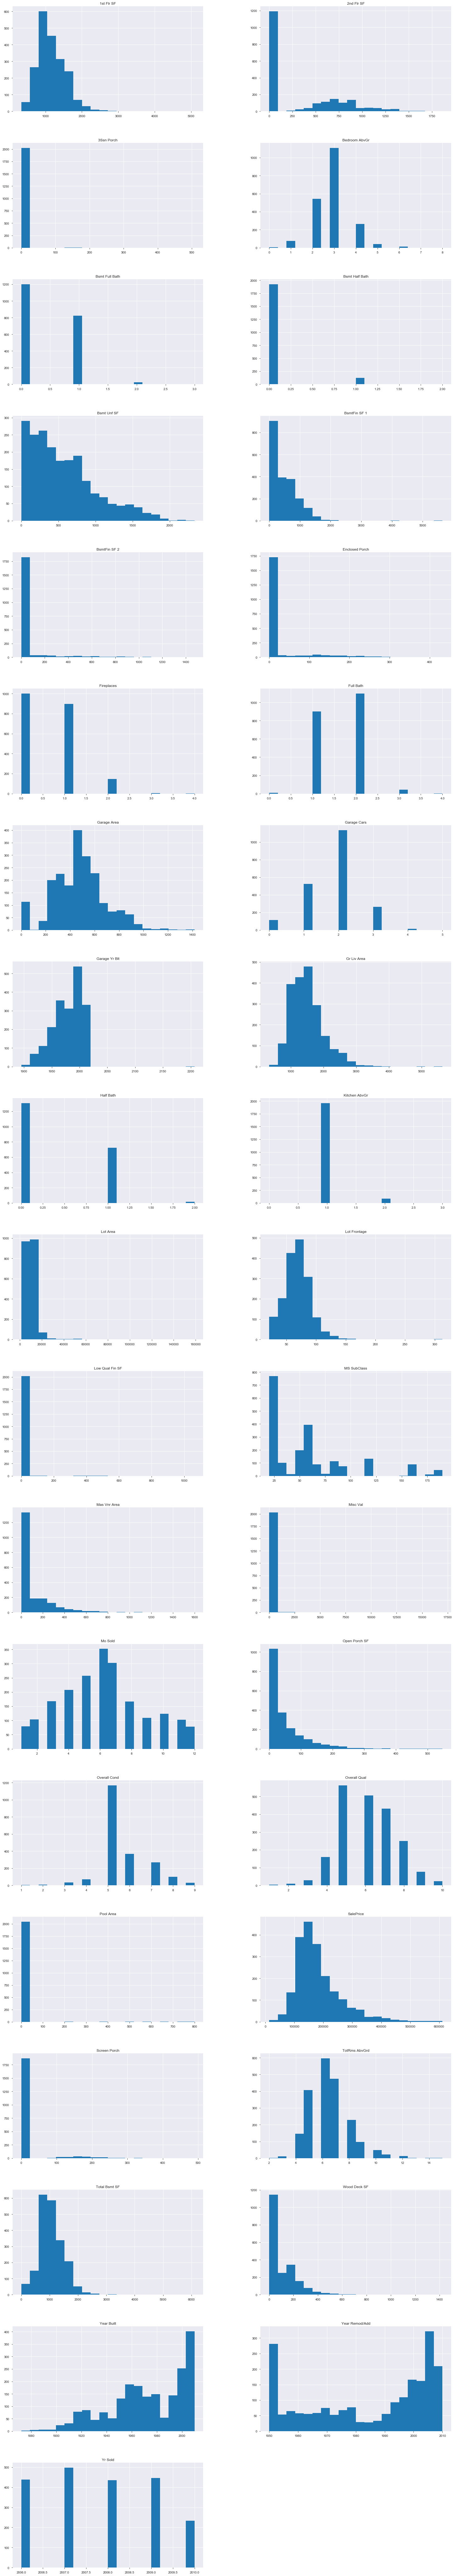

In [14]:
df.hist(figsize = (25,150), layout= (19,2), bins = 20)

**Populating a list of columns from the dataframe and their options**

To check what are the data and its columns available from the dataset. 

In [15]:
for col in (list(df.columns)):
    print(col, ":", df[col].unique())

MS SubClass : [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS Zoning : ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Frontage : [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
Lot Area : [13517 11492  7922 ... 12444 11449  7558]
Street : ['Pave' 'Grvl']
Lot Shape : ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config : ['CulDSac' 'Inside' 'Corn

**Renaming columns to remove all capitalised entries, and also spaces.** 

Capitalisation and spaces were removed to make the dataset easier to recall column names by my own memory.

In [16]:
n_col = df.columns
rename_dict = {}
for col in n_col: 
    rename_dict[col] = col.lower().replace(' ', "")

df.rename(columns = rename_dict, inplace = True)
df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

**Identifying categorical and continuous variables**

I will be using iteration of the dataframe column index to identify which variables are categorical or continuous.

In [17]:
## to populate a list of categorical variables
cat_col = df.columns
cat_list = list(df.select_dtypes(include = 'object').columns)

In [18]:
## iterating through the categorical variable list to print out the variables and the unique entries
for col in cat_list:
    print(col, df[col].unique())
    
## creating a dictionary of categorical variables and the number of categories 
cat_options = {}
for col in cat_list:
    cat_options[col] = len(df[col].unique())

mszoning ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street ['Pave' 'Grvl']
lotshape ['IR1' 'Reg' 'IR2' 'IR3']
landcontour ['Lvl' 'HLS' 'Bnk' 'Low']
utilities ['AllPub' 'NoSeWa' 'NoSewr']
lotconfig ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
landslope ['Gtl' 'Sev' 'Mod']
neighborhood ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition1 ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition2 ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldgtype ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
housestyle ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roofstyle ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
roofmatl ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
exterior1st ['Hd

In [22]:
## removing saleprice from list because saleprice is the target
cont_list.remove('saleprice')
cont_list

['mssubclass',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremod/add',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

### 4. Exploring correlations between continuous variables 
Correlations between continuous variables were explored to see if they had good significant Pearson correlation with `saleprice` and then were tested for multicollinearity using varience inflation factor from scikit learn. 

(array([0.5]), <a list of 1 Text xticklabel objects>)

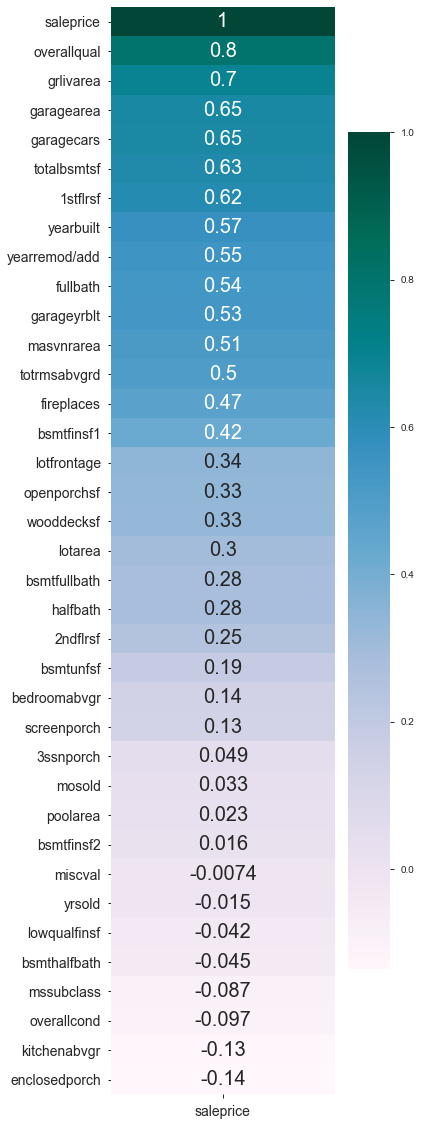

In [24]:
plt.figure(figsize = (5,20))
#ax = sns.heatmap(df[cont_list].corr(), annot = True)

ax= sns.heatmap(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',ascending = False),annot=True,  annot_kws={"size": 20}, cmap='PuBuGn')
ax.set_ylim(37,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [25]:
## calculating the P value of the correlations above
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

## calculating the P values of the correlation between continuous variables and saleprice
calculate_pvalues(df[cont_list])['saleprice'].sort_values(ascending = False)

miscval          0.7385
yrsold           0.4914
poolarea         0.2956
mosold           0.1383
lowqualfinsf     0.0596
3ssnporch        0.0273
mssubclass       0.0001
grlivarea             0
lotarea               0
overallqual           0
overallcond           0
yearbuilt             0
yearremod/add         0
1stflrsf              0
2ndflrsf              0
saleprice             0
fullbath              0
halfbath              0
kitchenabvgr          0
totrmsabvgrd          0
fireplaces            0
wooddecksf            0
openporchsf           0
enclosedporch         0
screenporch           0
bedroomabvgr          0
Name: saleprice, dtype: object

In [28]:
## making a function to find collinearity between expected collinear variables
def viffinder(varlist):
    vif = pd.DataFrame()
    vif["variables"] = varlist
    vif["VIF"] = [variance_inflation_factor(df[varlist].dropna().values, i) for i in range(df[varlist].shape[1])]
    print(vif)

In [67]:
## selecting the top few variables correlation to saleprice, positive correlations 
## were chosen as negative correlations had small correlation coefficients.

top_corr_list = list(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',\
                                                ascending = False).nlargest(20,['saleprice']).index)
print(top_corr_list)


['saleprice', 'overallqual', 'grlivarea', 'garagearea', 'garagecars', 'totalbsmtsf', '1stflrsf', 'yearbuilt', 'yearremod/add', 'fullbath', 'garageyrblt', 'masvnrarea', 'totrmsabvgrd', 'fireplaces', 'bsmtfinsf1', 'lotfrontage', 'openporchsf', 'wooddecksf', 'lotarea', 'bsmtfullbath']


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

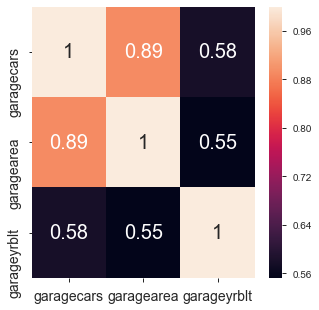

In [68]:
## garage related variables were chosen from the top correlated list and plotted
garage_trio = ['garagecars', 'garagearea', 'garageyrblt']

plt.figure(figsize = (5,5))
ax = sns.heatmap(df[garage_trio].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(3,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [29]:
## finding the VIF
viffinder(garage_trio)

     variables        VIF
0   garagecars  33.658878
1   garagearea  28.954657
2  garageyrblt   9.930975


All of the garage related variables have VIF which shows high collinearity, thus `garagearea` will be chosen as it has the highest correlation to `saleprice`.

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

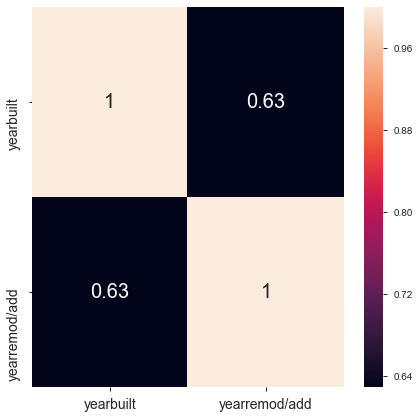

In [75]:
## the variables relating to year of last build were tested 
year_var = ['yearbuilt', 'yearremod/add']

plt.figure(figsize = (7,7))
ax = sns.heatmap(df[year_var].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(2,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [76]:
#finding the VIF
viffinder(year_var)

       variables          VIF
0      yearbuilt  7023.224832
1  yearremod/add  7023.224832


Both `yearbuilt` and `yearremod/add` showed very high VIF values with each other, thus `yearremod/add` was dropped as it had a lower correlation.

In [53]:
## basement related variables were listed together
basementvar =[cat for cat in top_corr_list if cat.find('bsmt') >= 0 ]
basementvar

['totalbsmtsf', 'bsmtfinsf1', 'bsmtfullbath']

,yearbuilt,yearremod/add
yearbuilt,0,0
yearremod/add,0,0


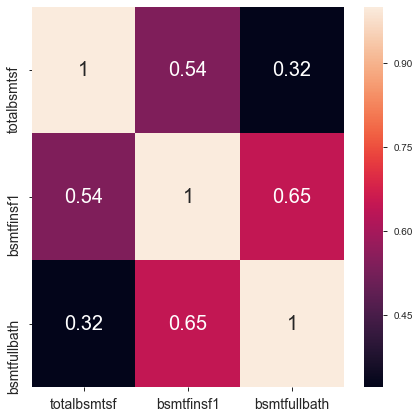

In [55]:
## basement related variables were plotted for correlation.
plt.figure(figsize = (7,7))
ax = sns.heatmap(df[basementvar].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(3,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [56]:
viffinder(basementvar)

      variables       VIF
0   totalbsmtsf  2.700242
1    bsmtfinsf1  4.011483
2  bsmtfullbath  2.814722


In [77]:
## the rest of the variables are checked
tot_rooms = ['grlivarea', 'totrmsabvgrd', 'fullbath', '1stflrsf', 'overallqual']

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

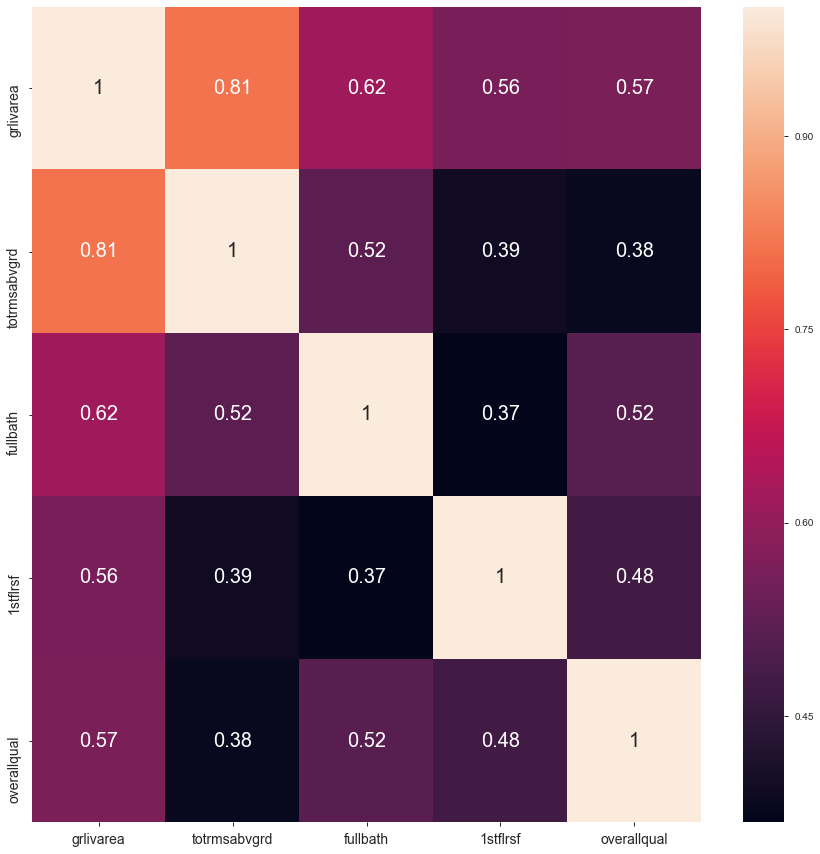

In [80]:
## the variables were plotted for correlation.
plt.figure(figsize = (15,15))
ax = sns.heatmap(df[tot_rooms].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(5,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [81]:
# VIF found
viffinder(tot_rooms)

      variables        VIF
0     grlivarea  36.804360
1  totrmsabvgrd  34.776712
2      fullbath  16.075335
3      1stflrsf  14.438963
4   overallqual  23.193200


In [83]:
## as overallqual was shown to be overall correlated to all variables, 
##it was removed to see if there was a considerable effect in collinearity
tot_rooms.remove('overallqual')
viffinder(tot_rooms)

      variables        VIF
0     grlivarea  36.701427
1  totrmsabvgrd  32.213834
2      fullbath  14.183354
3      1stflrsf  12.196138


All variables were shown to be high collinear to each other, thus `overallqual` was chosen to remain as it was the most highly correlated.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

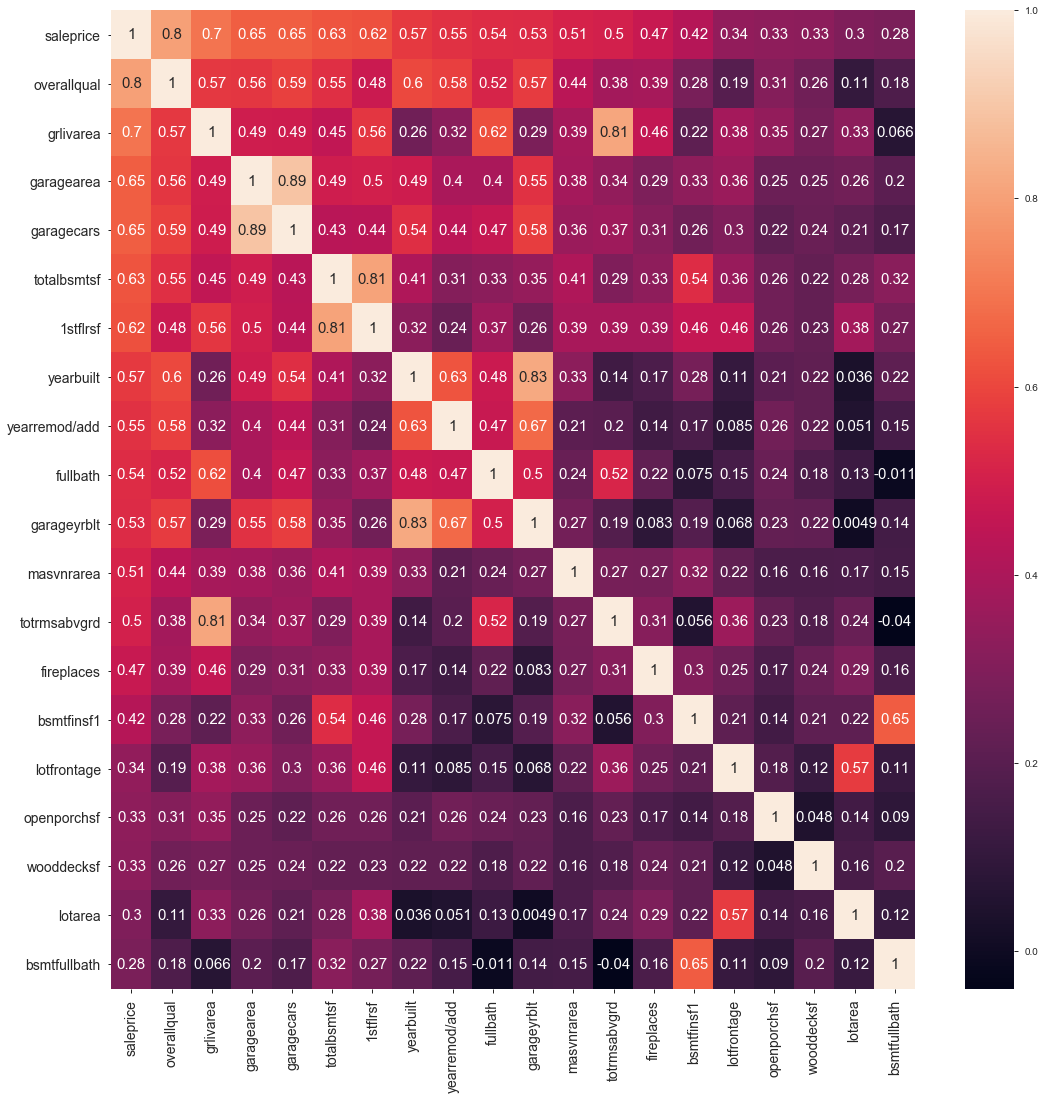

In [65]:
plt.figure(figsize = (18,18))
ax = sns.heatmap(df[top_corr_list].corr(), annot = True, annot_kws={"size": 15})
ax.set_ylim(20,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

Out of the basement related variables, `bsmtfinsf1` was chosen to be be dropped as the VIF is trending high (4) and also has been shown to have a moderate correlation to the other two basement related variables.

In [85]:
## removing saleprice (as it is the same target) and also garagecars (highly related to garagearea)
top_corr_list.remove('saleprice') # removed as that is target
top_corr_list.remove('garagecars') # removed as VIF is high - high collinearity
top_corr_list.remove('bsmtfinsf1')# removed as VIF is high - high collinearity
top_corr_list.remove('yearremod/add') # removed as VIF is high - high collinearity
top_corr_list.remove('garageyrblt') #removed as VIF is high - high collinearity
top_corr_list.remove('grlivarea') #removed as VIF is high - high collinearity
top_corr_list.remove('totrmsabvgrd') #removed as VIF is high - high collinearity
top_corr_list.remove('fullbath') #removed as VIF is high - high collinearity
top_corr_list.remove('1stflrsf') #removed as VIF is high - high collinearity
top_corr_list

['overallqual',
 'garagearea',
 'totalbsmtsf',
 'yearbuilt',
 'masvnrarea',
 'fireplaces',
 'lotfrontage',
 'openporchsf',
 'wooddecksf',
 'lotarea',
 'bsmtfullbath']

### 5. Using simple statistical inference tests to determine a possible relationship between categorical  variables and price

I will be using a number of statistical inference tests to see if any of the relationships between categorical variables and price are significant before running linear regression.

In [20]:
# listing out continuous variables
cont_col = df.columns
cont_list = list(df.select_dtypes(include = 'int').columns)

In [115]:
df[cont_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 26 columns):
mssubclass       2051 non-null int64
lotarea          2051 non-null int64
overallqual      2051 non-null int64
overallcond      2051 non-null int64
yearbuilt        2051 non-null int64
yearremod/add    2051 non-null int64
1stflrsf         2051 non-null int64
2ndflrsf         2051 non-null int64
lowqualfinsf     2051 non-null int64
grlivarea        2051 non-null int64
fullbath         2051 non-null int64
halfbath         2051 non-null int64
bedroomabvgr     2051 non-null int64
kitchenabvgr     2051 non-null int64
totrmsabvgrd     2051 non-null int64
fireplaces       2051 non-null int64
wooddecksf       2051 non-null int64
openporchsf      2051 non-null int64
enclosedporch    2051 non-null int64
3ssnporch        2051 non-null int64
screenporch      2051 non-null int64
poolarea         2051 non-null int64
miscval          2051 non-null int64
mosold           2051 non-null int64
yrsol

In [23]:
df[cont_list].describe()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,5.512921,1499.330083,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,51.068870,500.447829,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,0.000000,1129.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,0.000000,1444.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,0.000000,1728.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5642.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [86]:
## selecting categories for t-test 
ttest_list = []
for catkey, catvalues in cat_options.items(): 
    if catvalues == 2:
        ttest_list.append(catkey)
ttest_list

['street', 'centralair']

In [87]:
## creating a plotting function
def bpgraphduo(data1, data2):
    plt.boxplot()

In [88]:
## performing t-test on columns in ttest_list
cat_result_dict = {}
for tcand in ttest_list:
    cat1 = df[df[tcand]==(df[tcand].unique()[0])]['saleprice']
    cat2 = df[df[tcand]==(df[tcand].unique()[1])]['saleprice']
    t, p = stats.ttest_ind(cat1, cat2)
    sig = ''
    if p <= 0.05:
        sig = 'Y'
    else: 
        sig = 'N'
    cat_result_dict[tcand] = {df[tcand].unique()[0]:cat1.mean(),\
                              df[tcand].unique()[1]:cat2.mean(), \
                              'statistic': t, 'P': p, 'significance': sig}

cat_result_dict

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 13.068548592323888,
  'P': 1.5113094019787156e-37,
  'significance': 'Y'}}

Both street and centralair variables showed a significant difference in mean salesprice between categories. 
* Houses with paved streets had higher sale price as compared to gravel. 
* Houses with central airconditioning had higher sale price as compared to those without

In [89]:
## removing ttestlist variables from cat_list so that it will not be run again
def rem_entry_list(list1, list2):
    for var1 in list1: 
        if var1 in list2:
            list2.remove(var1)
            next
        return list2
rem_entry_list(ttest_list, cat_list)

['mszoning',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [90]:
## defining a function to perform ANOVA through the list 
def ANOVA_list(searchlist, dataframe, resultdict):
    a = {}
    for var in searchlist:
        var_unique_list = []
        count = 0
        resultdict[var] = {}
        for i in range(len(dataframe[var].unique())):
            count += 1 
            if pd.isnull(dataframe[var].unique()[i]) == True:
                next
            else:
                var_unique_list.append(dataframe[var].unique()[i])
                dataframe[var].unique()[i] = dataframe[dataframe[var]==\
                        (dataframe[var].unique()[i])]['saleprice']
        for cat in var_unique_list:
            if pd.isnull(cat) == True:
                next
            else:
                resultdict[var][str(cat)] = dataframe['saleprice'][dataframe[var] == cat].mean()
        f, p = stats.f_oneway(*(dataframe['saleprice'][dataframe[var] == cat] for cat in var_unique_list))
        resultdict[var]['statistic'] = f
        resultdict[var]['P'] = p 
    return resultdict

In [91]:
ANOVA_list(cat_list, df, cat_result_dict)

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 170.78696230993063,
  'P': 1.5113094019793903e-37},
 'mszoning': {'RL': 191235.16458072592,
  'RM': 129119.14240506329,
  'FV': 218618.31683168316,
  'C (all)': 78010.8947368421,
  'A (agr)': 47300.0,
  'RH': 148859.57142857142,
  'I (all)': 57625.0,
  'statistic': 42.46657889196624,
  'P': 4.706623428740341e-49},
 'lotshape': {'IR1': 211848.67052023122,
  'Reg': 162925.81235521234,
  'IR2': 233954.74545454545,
  'IR3': 193182.22222222222,
  'statistic': 72.48679839510044,
  'P': 1.491278709891155e-44},
 'landcontour': {'Lvl': 178998.5648399349,
  'HLS': 262353.37647058826,
  'Bnk': 142868.775,
  'Low': 199313.11627906977,
  'statistic': 39.23484353043047,
  'P': 1.1956767644954456e-24},
 'utilities': {'AllPub': 181551.60224499757,
  'NoSeWa': 137500.

In [92]:
# iterating the dictionary to provide list of significant 
significantlist = []
for key1, dict1 in cat_result_dict.items(): 
    for key2, value1 in dict1.items():
        if key2 == 'P':
            if value1 < 0.05:
                significantlist.append(key1)
        else: 
            next
significantlist

['street',
 'centralair',
 'mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [93]:
## creating a dict of variables with highest statistic 
top_Fstatistic_dict = {}
index = []
count = 0
for key1, dict1 in cat_result_dict.items(): 
    if dict1['P'] <= 0.05:
        top_Fstatistic_dict[key1] = dict1['statistic']
        index.append(count)
        count += 1
    else: 
        next
Fstat_df = pd.DataFrame(list(top_Fstatistic_dict.items()), index = index, columns = ["variable", "stat"])


In [95]:
## creating a list of categorical variables with high T or F statistic
top_stat_list = list(Fstat_df.sort_values(by = 'stat', ascending = False).nlargest(15,['stat'])['variable'])

In [96]:
## removing related variables 
top_stat_list.remove('bsmtexposure')
top_stat_list.remove('bsmtfintype1')
top_stat_list.remove('garagetype')

top_stat_list

['exterqual',
 'kitchenqual',
 'bsmtqual',
 'garagefinish',
 'masvnrtype',
 'centralair',
 'foundation',
 'heatingqc',
 'neighborhood',
 'paveddrive',
 'lotshape',
 'saletype']

### Finding out which categorical variables that have NaN values 
To properly determine which categorical variables have logical NaN values that can be explained I created a na_list so as to determine out of the dataset which variables have a nan unique category. 


In [19]:
## finding which categorical variable has nan unique cat
na_list = []
for col in cat_list:
    for cat in df[col].unique():
        if type(cat) == float:
            na_list.append(col)
print('categories with nan entries', na_list)

categories with nan entries ['masvnrtype', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'garagetype', 'garagefinish', 'garagequal', 'garagecond']


I then compared the variables to the data dictionary provided in the kaggle website with other documentation. 

|Variables|NaN meaning|Decision|
|---|---|---|
|masvnrtype|missing values|to use an imputer to fill|
|bsmtqual|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtcond|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtexposure|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype1|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype2|No basement|change to a new category with No basement or use the continuous variable for the model|
|garagetype|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagefinish|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagequal|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagecond|No garage|change to a new category with No garage or use the continuous variable for the model|

Assumption: All categorical variables are true as a visual check on the available variables on the list shows that there are no ordinal nor categorical variables on it. 

In [116]:
df[top_stat_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 12 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        1996 non-null object
garagefinish    1937 non-null object
masvnrtype      2029 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
dtypes: object(12)
memory usage: 192.4+ KB


In [135]:
## filling in the missing variables
print(df.bsmtqual.mode())
print(df.garagefinish.mode())
print(df.masvnrtype.mode())

0    TA
dtype: object
0    Unf
dtype: object
0    None
dtype: object


To impute the missing variables, the mode of each column will be used. 

**Making dummies of categorical variables**

Changing the variables into dummy coded variables. This is for the ease of doing linear regression later. 

In [97]:
interest=top_stat_list+top_corr_list
interest.append('saleprice')
interestdf = df[interest]

In [98]:
interestdf.isnull().any()
interestdf = interestdf.dropna(axis = 0)

In [99]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2050
Data columns (total 24 columns):
exterqual       1560 non-null object
kitchenqual     1560 non-null object
bsmtqual        1560 non-null object
garagefinish    1560 non-null object
masvnrtype      1560 non-null object
centralair      1560 non-null object
foundation      1560 non-null object
heatingqc       1560 non-null object
neighborhood    1560 non-null object
paveddrive      1560 non-null object
lotshape        1560 non-null object
saletype        1560 non-null object
overallqual     1560 non-null int64
garagearea      1560 non-null float64
totalbsmtsf     1560 non-null float64
yearbuilt       1560 non-null int64
masvnrarea      1560 non-null float64
fireplaces      1560 non-null int64
lotfrontage     1560 non-null float64
openporchsf     1560 non-null int64
wooddecksf      1560 non-null int64
lotarea         1560 non-null int64
bsmtfullbath    1560 non-null float64
saleprice       1560 non-null int64
dtypes:

In [100]:
## making dummy variables
interestdf = pd.get_dummies(interestdf, drop_first = True)

In [101]:
interestdf.head()

,overallqual,garagearea,totalbsmtsf,yearbuilt,masvnrarea,fireplaces,lotfrontage,openporchsf,wooddecksf,lotarea,...,lotshape_IR3,lotshape_Reg,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
1,7,559.0,913.0,1996,132.0,1,43.0,74,0,11492,...,0,0,0,0,0,0,0,0,0,1
2,5,246.0,1057.0,1953,0.0,0,68.0,52,0,7922,...,0,1,0,0,0,0,0,0,0,1
3,5,400.0,384.0,2006,0.0,0,73.0,0,100,9802,...,0,1,0,0,0,0,0,0,0,1
4,6,484.0,676.0,1900,0.0,0,82.0,59,0,14235,...,0,0,0,0,0,0,0,0,0,1
5,6,578.0,1517.0,1966,0.0,1,137.0,0,0,16492,...,0,0,0,0,0,0,0,0,0,1


In [102]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2050
Data columns (total 74 columns):
overallqual             1560 non-null int64
garagearea              1560 non-null float64
totalbsmtsf             1560 non-null float64
yearbuilt               1560 non-null int64
masvnrarea              1560 non-null float64
fireplaces              1560 non-null int64
lotfrontage             1560 non-null float64
openporchsf             1560 non-null int64
wooddecksf              1560 non-null int64
lotarea                 1560 non-null int64
bsmtfullbath            1560 non-null float64
saleprice               1560 non-null int64
exterqual_Fa            1560 non-null uint8
exterqual_Gd            1560 non-null uint8
exterqual_TA            1560 non-null uint8
kitchenqual_Fa          1560 non-null uint8
kitchenqual_Gd          1560 non-null uint8
kitchenqual_TA          1560 non-null uint8
bsmtqual_Fa             1560 non-null uint8
bsmtqual_Gd             1560 non-null uint8
bsm

In [103]:
interest_list = (list(interestdf.columns))

In [104]:
interest_list.remove('saleprice')

In [105]:
interest_list

['overallqual',
 'garagearea',
 'totalbsmtsf',
 'yearbuilt',
 'masvnrarea',
 'fireplaces',
 'lotfrontage',
 'openporchsf',
 'wooddecksf',
 'lotarea',
 'bsmtfullbath',
 'exterqual_Fa',
 'exterqual_Gd',
 'exterqual_TA',
 'kitchenqual_Fa',
 'kitchenqual_Gd',
 'kitchenqual_TA',
 'bsmtqual_Fa',
 'bsmtqual_Gd',
 'bsmtqual_Po',
 'bsmtqual_TA',
 'garagefinish_RFn',
 'garagefinish_Unf',
 'masvnrtype_BrkFace',
 'masvnrtype_None',
 'masvnrtype_Stone',
 'centralair_Y',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Stone',
 'foundation_Wood',
 'heatingqc_Fa',
 'heatingqc_Gd',
 'heatingqc_Po',
 'heatingqc_TA',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_No

In [106]:
lr = LinearRegression()

In [121]:
X = interestdf[interest_list]
y = interestdf['saleprice']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [124]:
model = lr.fit(X_train,y_train)
score = model.score(X_train,y_train)

predictions = model.predict(X_train)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]), <a list of 9 Text xticklabel objects>)

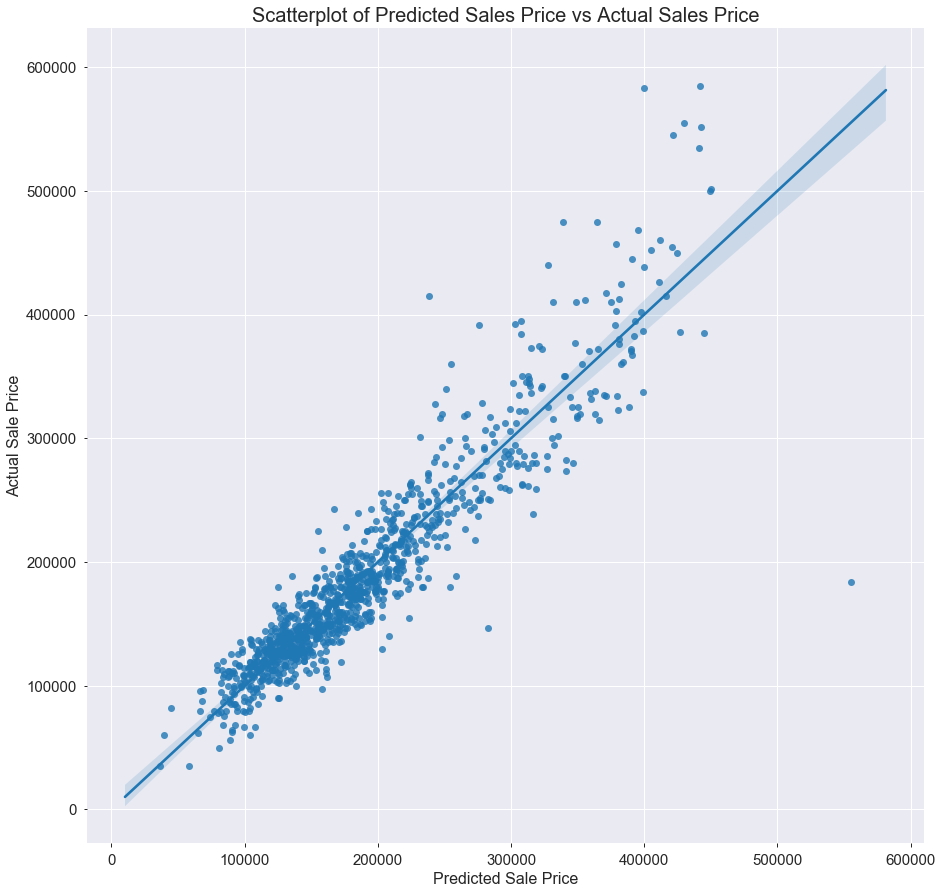

In [125]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (15,15))
ax = sns.regplot(predictions, y_train)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [126]:
print(model.coef_)
print(model.intercept_)

[ 1.31259890e+04  4.69605961e+01  1.69838974e+01  1.83658017e+01
  2.40488631e+01  1.35948523e+04  2.10196098e+02  3.52981554e+01
  3.51213185e+01  1.59774726e+00  7.51779049e+03 -3.50082549e+04
 -2.51086989e+04 -3.06866368e+04 -4.19418792e+04 -3.44474940e+04
 -3.98760289e+04 -1.68121996e+04 -1.80879207e+04 -2.95859140e+03
 -1.53011203e+04 -4.06095326e+03 -4.90304934e+03  1.82911239e+04
  2.08139744e+04  2.59568626e+04  5.45004014e+03 -2.85068960e+03
  4.27073153e+03 -1.87037587e+02  6.76664058e-10 -6.65091827e+03
 -9.02644798e+02 -1.00062615e+03 -8.13651322e+03  5.79680566e+03
  4.00328127e+03  9.06147897e+03  2.04526463e+04  1.27961341e+04
  2.82048034e+04 -5.72102307e+03  1.05239784e+04  2.22930764e+03
  1.65736178e+03  4.72853979e+03  9.17850001e+03  2.25596790e+03
  2.29328453e+04  9.28956143e+03  7.02715489e+04  3.25111380e+04
  3.21858839e+03  5.38285613e+03  2.81868218e+03  1.45644114e+04
  1.90964149e+04  5.83497824e+04  1.65881665e+04  4.68052554e+04
  8.54147754e+02  8.09876

In [127]:
print(score)

0.8689909354799283


In [128]:
model = lr.fit(X_test,y_test)
score = model.score(X_test,y_test)

predictions = model.predict(X_test)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text xticklabel objects>)

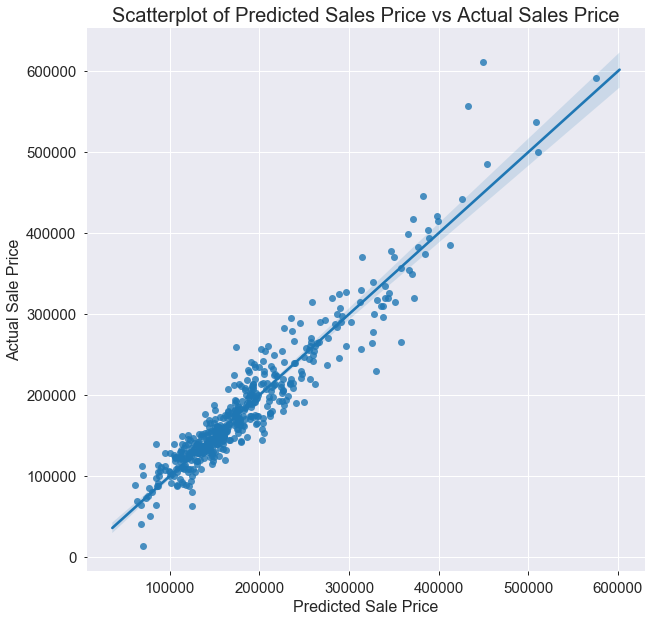

In [132]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (10,10))
ax = sns.regplot(predictions, y_test)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [130]:
print(model.coef_)
print(model.intercept_)

[ 1.28820815e+04  5.36590087e+01  1.89874548e+01 -1.26508387e+01
  9.22826466e+01  6.93137304e+03  1.63347785e+02  4.81214750e+01
  2.44223753e+00  2.54240744e+00  2.81400870e+03 -3.52120803e+04
 -3.61757238e+03 -6.21828743e+03 -5.42102447e+04 -3.64683882e+04
 -4.78050259e+04 -4.10679535e+04 -3.21964866e+04 -2.98314262e-10
 -3.30215527e+04 -5.94897659e+03 -1.09689417e+04  2.43359442e+04
  3.73491926e+04  2.47277589e+04  2.27073336e+04 -2.10511070e+03
  8.11302631e+02 -1.09769010e+04  1.12736524e+04 -7.86644496e+02
  3.72711267e+03  7.17952398e+02 -2.45838134e+03 -1.87368542e+04
 -1.55955368e+04 -3.86353592e+02 -3.13266624e+02 -1.63042611e+03
  2.56464023e+04 -6.14469037e+03 -8.86918444e+01  1.45519152e-11
 -3.40222427e+03  2.53945604e+03 -8.32763196e+03 -6.77899102e+03
 -1.27654491e+02 -1.06067720e+03  3.76287254e+04  6.58068380e+03
 -6.52860624e+03 -1.11939691e+04 -8.09749131e+03 -9.03592583e+03
 -4.62446026e+03  5.84165715e+04 -4.23365541e+03  4.73775315e+03
 -2.01508964e+02  9.86939

In [131]:
print(score)

0.9071695131649689


In [112]:
ls

Project 2.ipynb
README.md*
Untitled.ipynb
datasets/
dsi-us-6-project-2-regression-challenge/
suggestions.md*
